# Treasury rates
When short term and long term rates get inverted, historically this has been a signal that the economy would be entering a rough patch. This notebook explores different rates over time, highlighting time periods involving rate inversions.

In [1]:
date_from = ''
date_from__placeholder = 'Start date (MM/YYYY)'

date_to = ''
date_to__placeholder = 'End date (MM/YYYY)'

rate1 = '3 mo'
rate2 = '10 yr'

def get_rates():
    return ['1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr']
rate1__choices = get_rates()
rate2__choices = get_rates()

In [2]:
import datetime
import pandas as pd
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('rates.csv')#, parse_dates=['Date'])
# https://stackoverflow.com/questions/29882573/pandas-slow-date-conversion
def parse_date(v):
    year, month, day = int(v[6:8]), int(v[0:2]), int(v[3:5])
    year += 2000 if year < 50 else 1900
    return datetime.datetime(year, month, day)
df['Date'] = df['Date'].apply(parse_date)

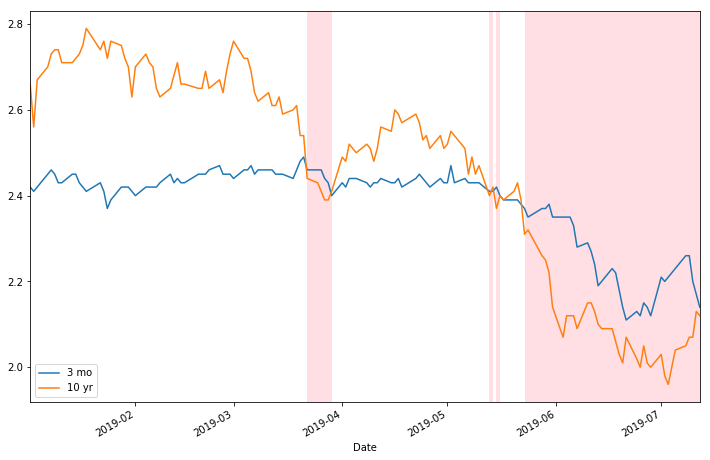

In [3]:
if '/' not in date_to:
    date_to = str(int(date_to)+1)
subset = df.query('@date_from <= Date <= @date_to')

plt.rcParams["figure.figsize"] = [12,8]

fig, ax = plt.subplots()
subset.plot.line('Date', rate1, ax=ax)
subset.plot.line('Date', rate2, ax=ax)

def highlight(dates,ax):
    def highlight_block(start, end):
        ax.axvspan(start, end, facecolor='pink', edgecolor='none', alpha=.5)
        
    start_idx = None
    for idx,dt in dates.items():
        # https://stackoverflow.com/questions/8270981/in-a-matplotlib-plot-can-i-highlight-specific-x-value-ranges
        num = date2num(dt)
        if start_idx is None:
            start_idx = idx
            start_num = num
        elif idx > last_idx+1:
            # done with block
            highlight_block(start_num, last_num)
            
            start_idx = idx
            start_num = num
        
        last_idx = idx
        last_num = num+1
    
    if start_idx:
        # final block
        highlight_block(start_num, last_num)
        
highlight(subset[subset[rate1] > subset[rate2]]['Date'], ax)